In [1]:
# This is a sample script to analyze the results of measuring talker_listener.
# Please build the caret_analyze package before using it.
# The source code used for the measurement can be found here:
# https://github.com/hsgwa/trace_samples

In [2]:
import os
import sys

home = os.path.expanduser('~')
sys.path.append(home + '/ros2_caret_ws/build/caret_analyze')
sys.path.append(home + '/ros2_caret_ws/install/caret_analyze_cpp_impl/lib/python3.8/site-packages')
# or execute soruce command before running jupyter.
# source ~/ros2_caret_ws/install/local_setup.bash

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

In [5]:
import caret_analyze as caret
import caret_analyze.plot as caret_plot

Succeed to find record_cpp_impl. the C++ version will be used.


In [6]:
trace_dir_path = './cyclic_pipeline_intra_process/'
lttng = caret.Lttng(trace_dir_path, force_conversion=True)

found converted file but will re-create it: ./cyclic_pipeline_intra_process/converted
converting trace directory: ./cyclic_pipeline_intra_process
converted 258 events in 59 ms
output written to: ./cyclic_pipeline_intra_process/converted
 [100%] [Ros2Handler]


In [7]:
arch = caret.Architecture()
architecture_path = './cyclic_pipeline_intra_process/architecture.yaml'
arch.import_file(file_path = architecture_path, file_type='yaml', latency_composer=lttng)

In [8]:
app = caret.Application(arch)

In [9]:
node = app.nodes[0]
print('node_name: ' + node.node_name)

callback = node.callbacks[0]
print('callback_type: ' + callback.TYPE_NAME)
print('subscription topic name :' + callback.topic_name)
print('callback_name: ' + callback.callback_name)
print('callback symbol: ' + callback.symbol)
print('callback unique name: ' + callback.unique_name)

node_name: /pipe1
callback_type: subscription_callback
subscription topic name :/topic1
callback_name: subscription_callback_0
callback symbol: IncrementerPipe::IncrementerPipe(std::__cxx11::basic_string<char,std::char_traits<char>,std::allocator<char>>const&,std::__cxx11::basic_string<char,std::char_traits<char>,std::allocator<char>>const&,std::__cxx11::basic_string<char,std::char_traits<char>,std::allocator<char>>const&)::{lambda(std::unique_ptr<std_msgs::msg::Int32>)#1}
callback unique name: /pipe1/subscription_callback_0


In [10]:
start_callback_unique_name = app.callbacks[0].unique_name
end_callback_unique_name = app.callbacks[0].unique_name
print('path search')
print('start_callback: ' + start_callback_unique_name)
print('end_callback: ' + end_callback_unique_name)

path search
start_callback: /pipe1/subscription_callback_0
end_callback: /pipe1/subscription_callback_0


In [11]:
paths = app.search_paths(start_callback_unique_name, end_callback_unique_name)

In [12]:
path = paths[0]

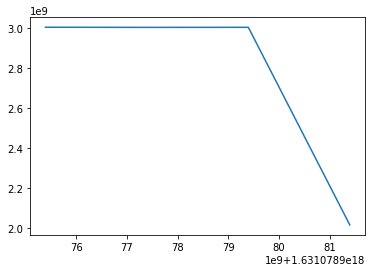

In [13]:
t, latency = path.to_timeseries()
plt.plot(t, latency)

In [14]:
path.to_timeseries()[1]

array([3.00209306e+09, 3.00143078e+09, 3.00171699e+09, 2.01710899e+09,
                  nan])

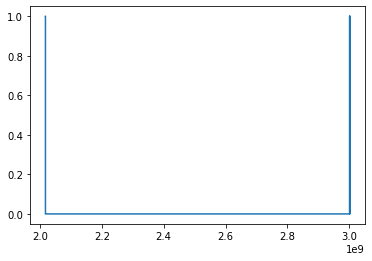

In [15]:
histogram, bins = path.to_histogram(binsize_ns=100000)
plt.step(bins[:-1], histogram, where='post')

In [16]:
df = path.to_dataframe(remove_dropped=True)
df

,/pipe1/subscription_callback_0/callback_start_timestamp/0,/pipe1/subscription_callback_0/callback_end_timestamp/0,/pipe1/subscription_callback_0/rclcpp_intra_publish_timestamp/0,/pipe2/subscription_callback_0/callback_start_timestamp/0,/pipe2/subscription_callback_0/callback_end_timestamp/0,/pipe2/subscription_callback_0/rclcpp_intra_publish_timestamp/0,/pipe1/subscription_callback_0/callback_start_timestamp/1,/pipe1/subscription_callback_0/callback_end_timestamp/1
0,1631078975392383571,1631078976392680372,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18
1,1631078977394216364,1631078978394476662,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18
2,1631078979395404917,1631078980395647265,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18
3,1631078981396823497,1631078982397121699,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18


In [17]:
caret_plot.message_flow(path, granularity= 'callback')

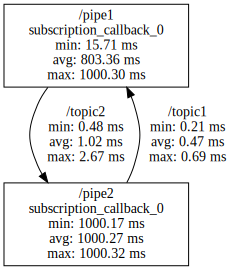

In [18]:
caret_plot.path_latency(path, granularity='callback')